We demonstrate Richardson Extrapolation applied to the forward difference formula, evaluating the derivative of $\arctan(x)$ at $x=\sqrt{2}$.

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def rich(func,h=.1,level=6):
    rmat=np.zeros((level,level))
    for loop in range(level):
        rmat[loop,0]=func(h=h)
        h/=2
        for loop2 in range(1,loop+1):
            rmat[loop,loop2]=2**(loop2)*rmat[loop,loop2-1]-rmat[loop-1,loop2-1]            
            rmat[loop,loop2]/=(2**(loop2)-1)
    return rmat
        
def for_diff(function=np.arctan,x=np.sqrt(2),h=.1):
    deriv=(function(x+h)-function(x))/h
    return deriv

def back_diff(function,x=0,h=.1):
    deriv=(function(x)-function(x-h))/h
    return deriv

def cent_diff(function,x=0,h=.1):
    deriv=(function(x+h)-function(x-h))/(2*h)
    return deriv




Here we use Richardson Extrapolation with 6 levels to approximate the derivative.  The starting step is $h=.5$ and the final step is $2^{-8}$.

[  7.8253792334948002e-10   1.5997037028370187e-11   3.6076697185194462e-13
   1.5765166949677223e-14   3.8746783559417963e-14   5.3312909642500017e-13
   4.6673775955241581e-13   1.9297896614034471e-12]


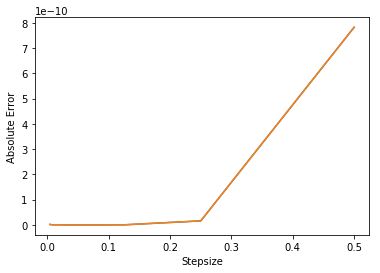

[[ 0.3327204662236625  0.                  0.                  0.                  0.
   0.                ]
 [ 0.3330266646935343  0.333332863163406   0.                  0.                  0.
   0.                ]
 [ 0.3331799401934177  0.3333332156933011  0.3333333332032661  0.                  0.
   0.                ]
 [ 0.3332566220524313  0.333333303911445   0.333333333317493
   0.3333333333338112  0.                  0.                ]
 [ 0.3332949740142794  0.3333333259761275  0.3333333333310217
   0.3333333333329544  0.3333333333328973  0.                ]
 [ 0.3333141527546104  0.3333333314949414  0.333333333334546
   0.3333333333350495  0.3333333333351892  0.3333333333352631]]


In [52]:
count=0
levels=6
h_vec=2**-np.arange(1,9,dtype=float) #vector of stepsizes
err=np.zeros(h_vec.size) #error vector for each stepsize
for dx in h_vec:
    rich_m=rich(for_diff,h=dx,level=levels) #richardson
    err[count]=np.absolute(rich_m[levels-1,levels-1]-1/3) #compute error
    #print(rich_m) 
    count+=1
print(err)
plt.plot(h_vec,err)
ax=plt.gca()
ax.set_xlabel('Stepsize')
ax.set_ylabel('Absolute Error')
plt.show()
#plot the final richardson extrapolation matrix
print(rich_m)

In [48]:
np.set_printoptions(precision=16)
print(np.diag(rich_m))


[ 0.3327204662236625  0.333332863163406   0.3333333332032661
  0.3333333333338112  0.3333333333328973  0.3333333333352631]


In an adaptive algorithm, we do not know the true solution.  There are
two methods for constructive adaptive algorithms.  
* The simplest, shown in this notebook, uses a predefined tolerance between subsequent levels of the Richardson Extrapolation to stop. 
* The 2nd uses asympotitic error estimates to decide at what point roundoff is starting to pollute the error estimate.  We will cover this later when discussing numerical integration.

In [61]:
def adap_rich(func,h=.1,atol=1E-10,maxlevels=10):
    rmat=np.zeros((maxlevels,maxlevels))
    loop=0
    tol_met=False
    while (loop < maxlevels-1):
        rmat[loop,0]=func(h=h)
        h/=2
        for loop2 in range(1,loop+1):
            rmat[loop,loop2]=2**(loop2)*rmat[loop,loop2-1]-rmat[loop-1,loop2-1]            
            rmat[loop,loop2]/=(2**(loop2)-1)
            if np.absolute(rmat[loop,loop]-rmat[loop-1,loop-1]) < atol:
                return rmat[0:loop+1,0:loop+1] #absolute tolerance should be relative
        loop+=1
    print('Maximum Levels Reached')               
    return rmat

rch=adap_rich(for_diff,h=.125)
print(rch)

[[ 0.3146221736127366  0.                  0.                  0.                  0.
   0.                ]
 [ 0.3237492852849169  0.3328763969570971  0.                  0.                  0.
   0.                ]
 [ 0.3284826192701793  0.3332159532554417  0.3333291386882233  0.                  0.
   0.                ]
 [ 0.3308931053127679  0.3333035913553566  0.3333328040553282
   0.3333333276792004  0.                  0.                ]
 [ 0.3321094766738639  0.3333258480349599  0.333333266928161
   0.3333333330528515  0.3333333334110948  0.                ]
 [ 0.3327204662236625  0.333331455773461   0.333333325019628
   0.333333333318409   0.3333333333361129  0.3333333333336941]]


In [62]:
print(rch)

[[ 0.3146221736127366  0.                  0.                  0.                  0.
   0.                ]
 [ 0.3237492852849169  0.3328763969570971  0.                  0.                  0.
   0.                ]
 [ 0.3284826192701793  0.3332159532554417  0.3333291386882233  0.                  0.
   0.                ]
 [ 0.3308931053127679  0.3333035913553566  0.3333328040553282
   0.3333333276792004  0.                  0.                ]
 [ 0.3321094766738639  0.3333258480349599  0.333333266928161
   0.3333333330528515  0.3333333334110948  0.                ]
 [ 0.3327204662236625  0.333331455773461   0.333333325019628
   0.333333333318409   0.3333333333361129  0.3333333333336941]]
